In [1]:
# ! pip install lime

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from lime import lime_image
import matplotlib.pyplot as plt
import matplotlib.image as img 
import numpy as np
from PIL import Image
from skimage.segmentation import mark_boundaries
from tensorflow.keras.preprocessing import image
from src import utils
import random
import os

/Users/jidhumohan/opt/anaconda3/envs/py39/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-05-07 15:28:11.851141: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
from src.helper.plot import view_image, plot_batch

# Load and predict using the model - One Image

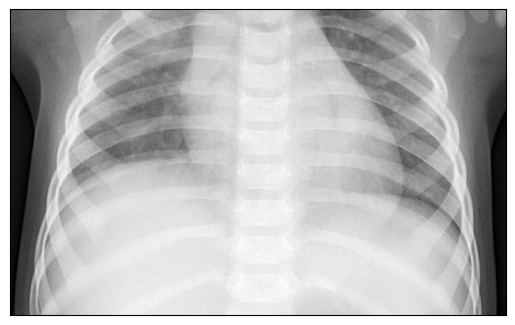

In [6]:
view_image("chest_xray/TRAIN/PNEUMONIA/person1_bacteria_1.jpeg")

In [7]:
img_Xray = image.load_img("chest_xray/TRAIN/PNEUMONIA/person1_bacteria_1.jpeg", 
                          target_size=(128, 128))
img_array = image.img_to_array(img_Xray)
img_batch = np.expand_dims(img_array/255, axis=0)
print(img_array.shape)
print(img_batch.shape)

(128, 128, 3)
(1, 128, 128, 3)


In [8]:
# load model architecture
model = utils.build_model_updated()
# Loads the weights
model.load_weights("models/model_deep_CNN.h5")
pred = model.predict(img_batch)
pred_classes = ['NORMAL','PNEUMONIA']
# for i in range(pred.shape[0]):
if pred[0][0]>0.8:
    print(pred_classes[0])
else:
    print(pred_classes[1])

2023-05-07 15:28:40.988289: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


1/1 [==============================] - 0s 277ms/step
PNEUMONIA


# use LIME

In [ ]:
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(img_batch[0].astype('double'), model.predict,
                                         top_labels=2, hide_color=0, num_samples=1000)

(-0.5, 127.5, 127.5, -0.5)

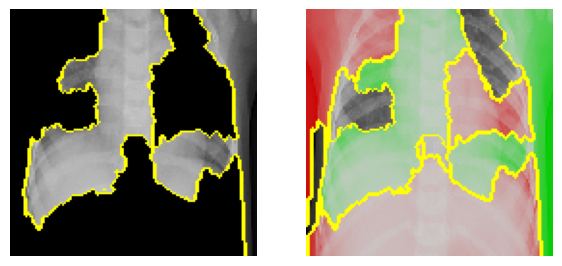

In [9]:
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7,7))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')
ax2.axis('off')

# Batch Predict

In [9]:
train_loader, test_loader, train_labels, test_labels = utils.load_data()

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
{'NORMAL': 0, 'PNEUMONIA': 1}


In [10]:
batch_length = len(test_loader)
batch_no = random.randint(0, batch_length-1)
X_img_batch, y_true_batch = test_loader[batch_no]
# y_true_batch

In [11]:
y_true_batch = y_true_batch.argmax(axis=-1)
y_pred_batch = model.predict(X_img_batch)
y_pred_batch = y_pred_batch.argmax(axis=-1)

print("-"*35)
print("%s%d"%     ("No of Test Batches      : ", batch_length))
print("-"*35)
print("%s%d"%     ("Selected Batch No       : ", batch_no))
print("-"*35)
print("%s%d"%     ("Batch Size              : ", len(y_pred_batch)))
print("-"*35)

2/2 [==============================] - 0s 59ms/step
-----------------------------------
No of Test Batches      : 13
-----------------------------------
Selected Batch No       : 0
-----------------------------------
Batch Size              : 50
-----------------------------------


# Plot Batch

2/2 [==============================] - 0s 48ms/step


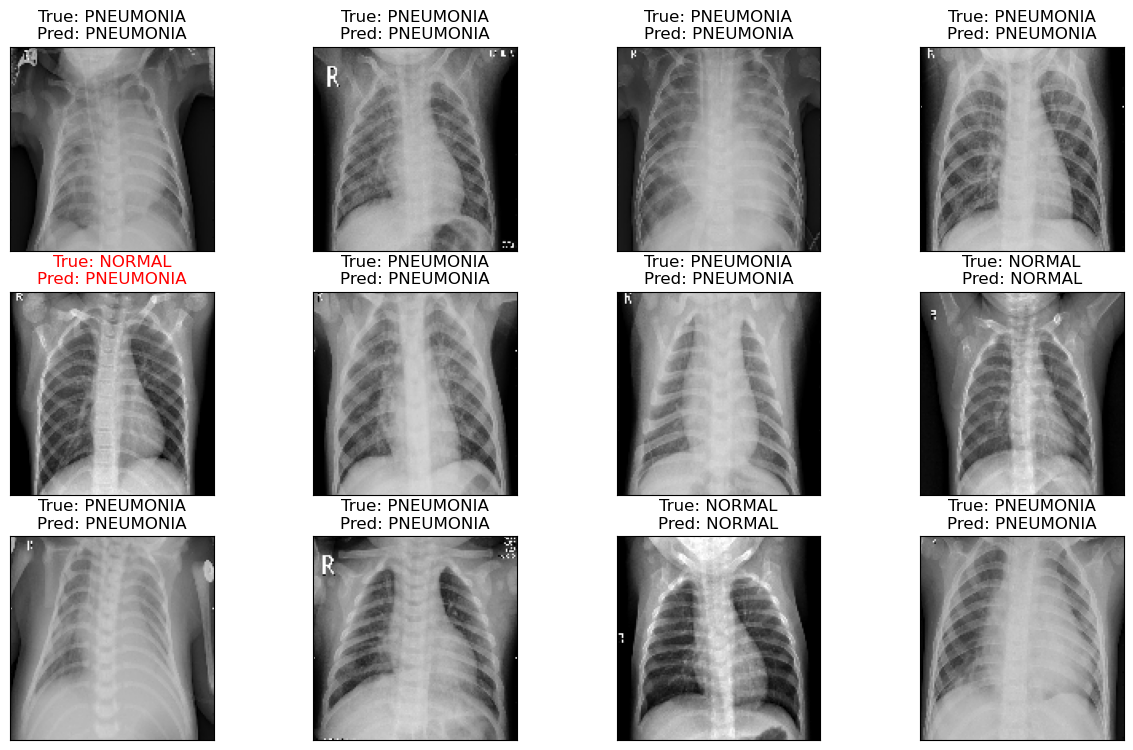

In [18]:
plot_batch(test_loader, model, 10)